In [1]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
%load_ext autoreload
%autoreload 2

## build dataset

### normal dataset

In [3]:
import dataset

In [ ]:
df_dataset = dataset.build_normal_dataframe(numpy_output_file='fulldata.npy', dataframe_output_file='df_cohort')

### autoencoded dataset

In [ ]:
import dataset
# params.encoder_training_epochs = 10   # uncomment if you want a short demo training
np_dataset = dataset.build_autoencoded_data_matrix(numpy_output_file='autoencoded_fulldata.npy')

## baseline model: train and evaluate

In [4]:
from baseline_model import RandomForest

Training Set:  Counter({0: 3559, 1: 2192})
Oversampling:  Counter({0: 3559, 1: 3559})


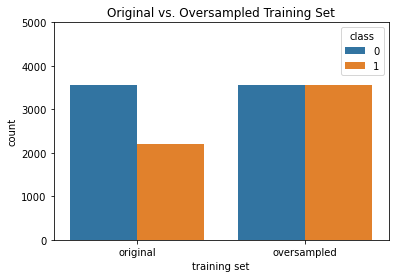

CV F1-score: 0.706 +/- 0.008
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       396
           1       0.63      0.68      0.65       244

    accuracy                           0.73       640
   macro avg       0.71      0.72      0.71       640
weighted avg       0.73      0.72      0.73       640


TN: 298 FP: 98 FN: 78 TP: 166

No Skill: ROC AUC=0.500
Rand Forest: ROC AUC=0.790


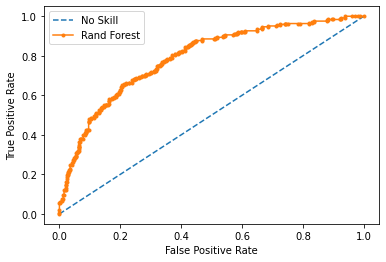

Rand Forest: f1=0.654 auc=0.696


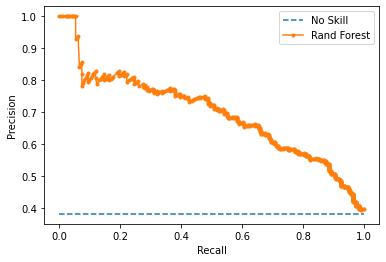

In [3]:
RandomForest(df_dataset)

## MLP: train and evaluate

### normal dataset

100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


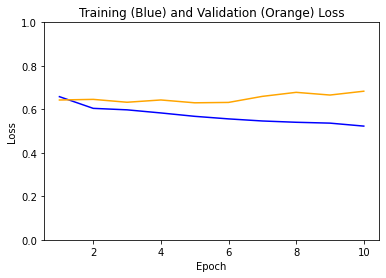

              precision    recall  f1-score   support

           0     0.7813    0.6521    0.7109       411
           1     0.5185    0.6725    0.5856       229

    accuracy                         0.6594       640
   macro avg     0.6499    0.6623    0.6482       640
weighted avg     0.6873    0.6594    0.6660       640


TN: 268 FP: 143 FN: 75 TP: 154

No Skill: ROC AUC=0.500
MLP: ROC AUC=0.720


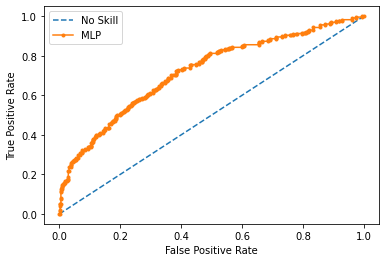


MLP: f1=0.586 auc=0.614


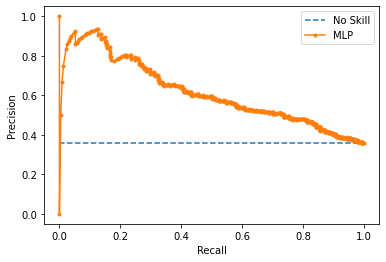

In [6]:
import MLP
import numpy as np

# Load data
df_dataset = np.load('data/fulldata.npy')

# Train Model
MLPmodel = MLP.binary(dataset=df_dataset, n_epochs=10, nodes=[676, 338], batch_size = 128, upper_y_lim = 1, p = 0.5)

### autoencoded dataset

  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([5112, 128])


100%|██████████| 10/10 [00:02<00:00,  5.00it/s]


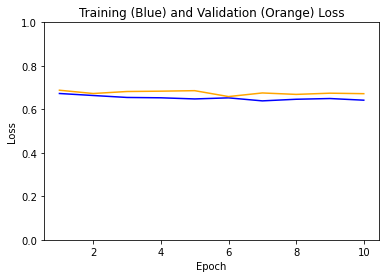

              precision    recall  f1-score   support

           0     0.7206    0.6414    0.6787       382
           1     0.5433    0.6318    0.5842       258

    accuracy                         0.6375       640
   macro avg     0.6320    0.6366    0.6314       640
weighted avg     0.6491    0.6375    0.6406       640


TN: 245 FP: 137 FN: 95 TP: 163

No Skill: ROC AUC=0.500
MLP: ROC AUC=0.679


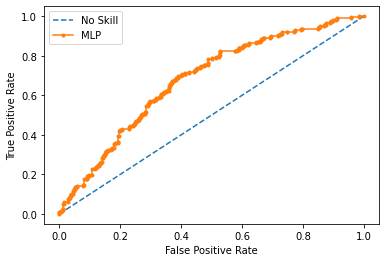


MLP: f1=0.584 auc=0.550


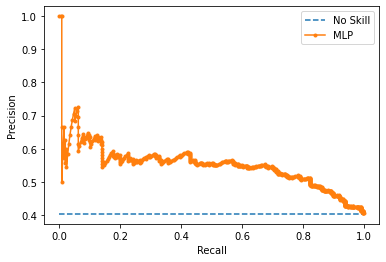

In [54]:
import MLP
import numpy as np

# Load data
df_dataset = np.load('data/autoencoded_fulldata.npy')

# Train Model
MLPmodel = MLP.binary(dataset=df_dataset, n_epochs=10, nodes=[128, 64], # [676, 338],
                      batch_size = 128, upper_y_lim = 1, p = 0.2)